In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fstr = 'D:/test.jpg'
#fstr = './img/messi5.jpg'


img_ori = cv2.imread(fstr)
if img_ori is None:
    print('Error : Loading image')
else:
    print('OK : Loading image')
    
    img = img_ori.copy()

OK : Loading image


In [4]:
px = img[100,100]
print(px)
px

[ 69 134  88]


array([ 69, 134,  88], dtype=uint8)

In [5]:
# accessing only blue pixel
blue = img[100,100,0]
print(blue)
blue

69


69

In [6]:
img[100,100] = [255,255,255]
print(img[100,100])

[255 255 255]


In [7]:
# accessing RED value
img.item(10,10,2)

34

In [8]:
# modifying RED value
img.itemset((10,10,2),100)
img.item(10,10,2)

100

In [9]:
print(img.shape)

(512, 769, 3)


In [10]:
print(img.size)


size = 1
for i in img.shape:
    size=size *i
size = 0 if size == 1 else size
print(size)

1181184
1181184


In [11]:
print(img.dtype)

uint8


In [12]:
##

In [13]:
cv2.imshow('original imgae',img_ori) #expects true color
img = img_ori.copy()

ball = img[280:340,330:390]
print(ball.shape)
img[273:333,100:160] = ball

cv2.imshow('modified image',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(60, 60, 3)


In [11]:
isDragging = False
x0,y0,w,h = -1,-1,-1,-1

ing_clr = (255,0,0)
end_clr = (0,0,255)

def onMouse(event, x, y, flags, param):
    global isDragging, x0, y0, w, h, img
    
    if event == cv2.EVENT_LBUTTONDOWN: # 드래그 시작을 위한 왼버튼 누르는 이벤트
        isDragging = True
        x0=x
        y0=y
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw = img.copy()
            cv2.rectangle(img_draw, (x0,y0), (x,y),ing_clr,2)
            cv2.imshow('img', img_draw)
    elif event == cv2.EVENT_LBUTTONUP:
        if isDragging:
            isDragging = False
            w = x-x0
            h = y-y0
            print(f'x:{x: 3d},y:{y: 3d},w:{w: 3d},h:{h: 3d}')
            if w > 0 and h > 0:
                img_draw = img.copy()
                cv2.rectangle(img_draw, (x0,y0), (x,y),end_clr,2 )
                cv2.imshow('img', img_draw)
                roi = img[y0:y0+h,x0:x0+w]
                cv2.imshow('roi', roi)
                cv2.moveWindow('roi',0,0)
                cv2.imwrite('./roi.jpg',roi)
                print('roi saved!')
            else:
                cv2.imshow('img', img)
                print('roi를 저장하려면 좌측상단에서 우측하단으로 드래그하세요.!')

img = cv2.imread(fstr)
cv2.imshow('img', img)
cv2.setMouseCallback('img',onMouse)
cv2.waitKey(0)
cv2.destroyAllWindows()

x: 577,y: 476,w: 89,h: 92
roi saved!


In [14]:

x, y, w, h = cv2.selectROI('img', img, True,True)
                        
if w and h:
    print(f'x:{x: 3d},y:{y: 3d},w:{w: 3d},h:{h: 3d}')
    roi = img[y:y+h, x:x+w]
    cv2.imshow('roi', roi)
    cv2.moveWindow('roi', 0,0)
    cv2.imwrite('roi.jpg',roi)

cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# x:  3,y: 283,w: 175,h: 44

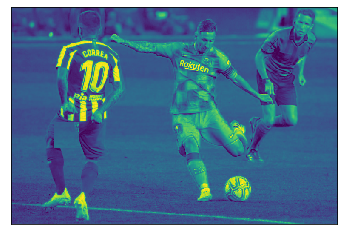

In [16]:
# opencv
b,g,r = cv2.split(img)
img = cv2.merge((b,g,r))

plt.imshow(b)
plt.xticks([]),plt.yticks([])
plt.show()

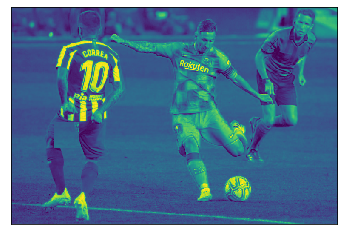

In [17]:
# numpy
b2,g2,r2 = np.dsplit(img,3)

plt.imshow(b)
plt.xticks([]),plt.yticks([])
plt.show()

In [18]:
print(np.array_equal(b,b2))

False


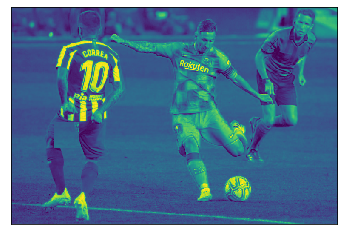

In [19]:
b = img[:,:,0]
plt.imshow(b)
plt.xticks([]),plt.yticks([])
plt.show()

In [20]:
cv2.imshow('blue channel img',b)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [21]:
img[:,:,2]= 0

In [22]:
cv2.imshow('zero red channel img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(120, 98, 3)
See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):


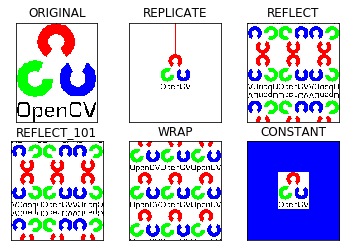

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

BLUE = [255,0,0] #BGR

fstr = 'D:/opencv_logo.png'
#fstr = './img/opencv_logo.png'

# ----------------------------
# Covnert the transparent part of PNG into white
img1 = cv2.imread(fstr,cv2.IMREAD_UNCHANGED)
alpha_channel = img1[:, :, 3]
_, mask = cv2.threshold(alpha_channel, 254, 255, cv2.THRESH_BINARY)  # binarize mask
color = img1[:, :, :3]
img1 = cv2.bitwise_not(cv2.bitwise_not(color, mask=mask))

print(img1.shape)

replicate  = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REPLICATE)
reflect    = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT)
reflect101 = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_REFLECT_101)
wrap       = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_WRAP)
constant   = cv2.copyMakeBorder(img1,100,100,100,100,cv2.BORDER_CONSTANT,value=BLUE)


#for matplotlib
img1       = img1[:,:,::-1]    
replicate  = replicate[:,:,::-1]
reflect    = reflect[:,:,::-1]
reflect101 = reflect101[:,:,::-1]
wrap       = wrap[:,:,::-1]
constant   = constant[:,:,::-1]


print('See the result above. (Image is displayed with matplotlib. So RED and BLUE planes will be interchanged):')
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.xticks([]);plt.yticks([])
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.xticks([]);plt.yticks([])
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.xticks([]);plt.yticks([])
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.xticks([]);plt.yticks([])
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.xticks([]);plt.yticks([])
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')
plt.xticks([]);plt.yticks([])
#plt.axis('off')

plt.show()